# Load the training data

In [2]:
import scipy.io as sio
rawtraining = sio.loadmat('givenData/TrainingSamplesDCT_8_new.mat')

# Estimate the prior probabilities from training data
The maximum likelihood estimate of the priors is $P(\text{cheetah})=\frac{n_c}{n}$ and $P(\text{background})=\frac{n_b}{n}$, where $n_c$, $n_b$ and $n$ are the number of cheetah, background and total samples respecitvely. Comparing this  estimator to the one we used last week, we realize that the intuitional estimate from last week is in fact the maximum likelihood eastimate.

In [3]:
numtrainFG, numtrainBG = rawtraining['TrainsampleDCT_FG'].shape[0], rawtraining['TrainsampleDCT_BG'].shape[0]
priorFG = numtrainFG/(numtrainBG+numtrainFG)
priorBG = numtrainBG/(numtrainBG+numtrainFG)

print('Number of Cheetah Training Samples:\t{0}\nNumber of Background Training Samples:\t{1}'.format(numtrainFG,numtrainBG))
print('P(cheetah)=\t{0:4.3f}\nP(background)=\t{1:4.3f}'.format(priorFG,priorBG))

Number of Cheetah Training Samples:	250
Number of Background Training Samples:	1053
P(cheetah)=	0.192
P(background)=	0.808


# Find the conditional class means and variances per index
The training data we are given corresponds to the DCT values of an 8x8 block of pixels corresponding to cheetah and to background. The data consists of 1053 observations of 64 element DCT arrays for the background and 250 observations of 64 element DCT arrays for the cheetah.  We will compute the mean and variance of each column of these data sets corresponding to maximum likelihood estimates for $P(X_k|cheetah)$ and $P(X_k|background)$, where $X_k$ is the DCT value for the $k^{th}$ index and $k\in \{0, \dots, 63$\}.

In [206]:
numbins = 64
dctlargest = 2

TrainsampleDCT_BG = rawtraining['TrainsampleDCT_BG']
TrainsampleDCT_FG = rawtraining['TrainsampleDCT_FG']

idxmeansBG = np.mean(TrainsampleDCT_BG, axis=0)
idxvarsBG = np.var(TrainsampleDCT_BG, axis=0)
    
idxmeansFG = np.mean(TrainsampleDCT_FG, axis=0)
idxvarsFG = np.var(TrainsampleDCT_FG, axis=0)

meandiff = idxmeansBG - idxmeansFG
largemeansidx = np.argsort(meandiff)[-8:] # get eight largest
smallmeansidx = np.argsort(meandiff)[:8] # get eight smallest

print('Index\t BG Means\tFG Means\tMean Diff\tBG Variances\tFG Variances')
for nn in range(64):
    print('{4:2}\t{0:9.2e}\t{2:9.2e}\t{5:9.2e}\t{1:9.2e}\t{3:8.2e}'.format(idxmeansBG[nn], idxvarsBG[nn], idxmeansFG[nn], idxvarsFG[nn], nn, meandiff[nn]))

Index	 BG Means	FG Means	Mean Diff	BG Variances	FG Variances
 0	 2.92e+00	 1.28e+00	 1.63e+00	 3.19e-01	1.91e-01
 1	-3.70e-03	 3.36e-02	-3.73e-02	 2.08e-02	4.72e-02
 2	 6.56e-03	-3.24e-02	 3.90e-02	 3.08e-02	5.19e-02
 3	-6.70e-04	 1.71e-02	-1.78e-02	 6.63e-03	1.24e-02
 4	 2.94e-03	-3.53e-03	 6.47e-03	 7.41e-03	1.34e-02
 5	-3.53e-03	 2.46e-03	-6.00e-03	 7.74e-03	1.86e-02
 6	 6.40e-04	-6.71e-04	 1.31e-03	 2.99e-03	1.33e-02
 7	 2.49e-04	 1.06e-02	-1.04e-02	 3.74e-03	1.26e-02
 8	 1.11e-03	 2.20e-03	-1.09e-03	 2.63e-03	1.09e-02
 9	 1.13e-03	-2.14e-03	 3.27e-03	 1.75e-03	6.70e-03
10	-4.80e-04	-2.95e-03	 2.47e-03	 5.91e-04	2.86e-03
11	 5.21e-05	-5.02e-04	 5.55e-04	 1.02e-03	5.46e-03
12	-1.18e-03	 2.34e-03	-3.52e-03	 1.68e-03	7.10e-03
13	 1.75e-03	 4.23e-04	 1.33e-03	 1.76e-03	1.05e-02
14	-1.40e-03	-8.43e-05	-1.32e-03	 1.28e-03	5.82e-03
15	 1.54e-03	-1.16e-03	 2.70e-03	 5.51e-04	2.43e-03
16	 6.93e-04	 4.16e-03	-3.47e-03	 7.62e-04	4.13e-03
17	 5.11e-04	-2.19e-03	 2.70e-03	 7.97e-04	6.04e-03
18	

# Plot the marginal distributions for each indexed DCT value
We are assuming each DCT value $X_k$ is Gaussian distributed with mean and variance estimates found in the previous step. By plotting each of these it will allow us to determine which of them are informative features and which are uninformative. A feature will be informative if we can use it to distinguish between cheetah and background. We will plot the marginal for cheetah and background on the same plot for each of the 64 indices for easy comparison.

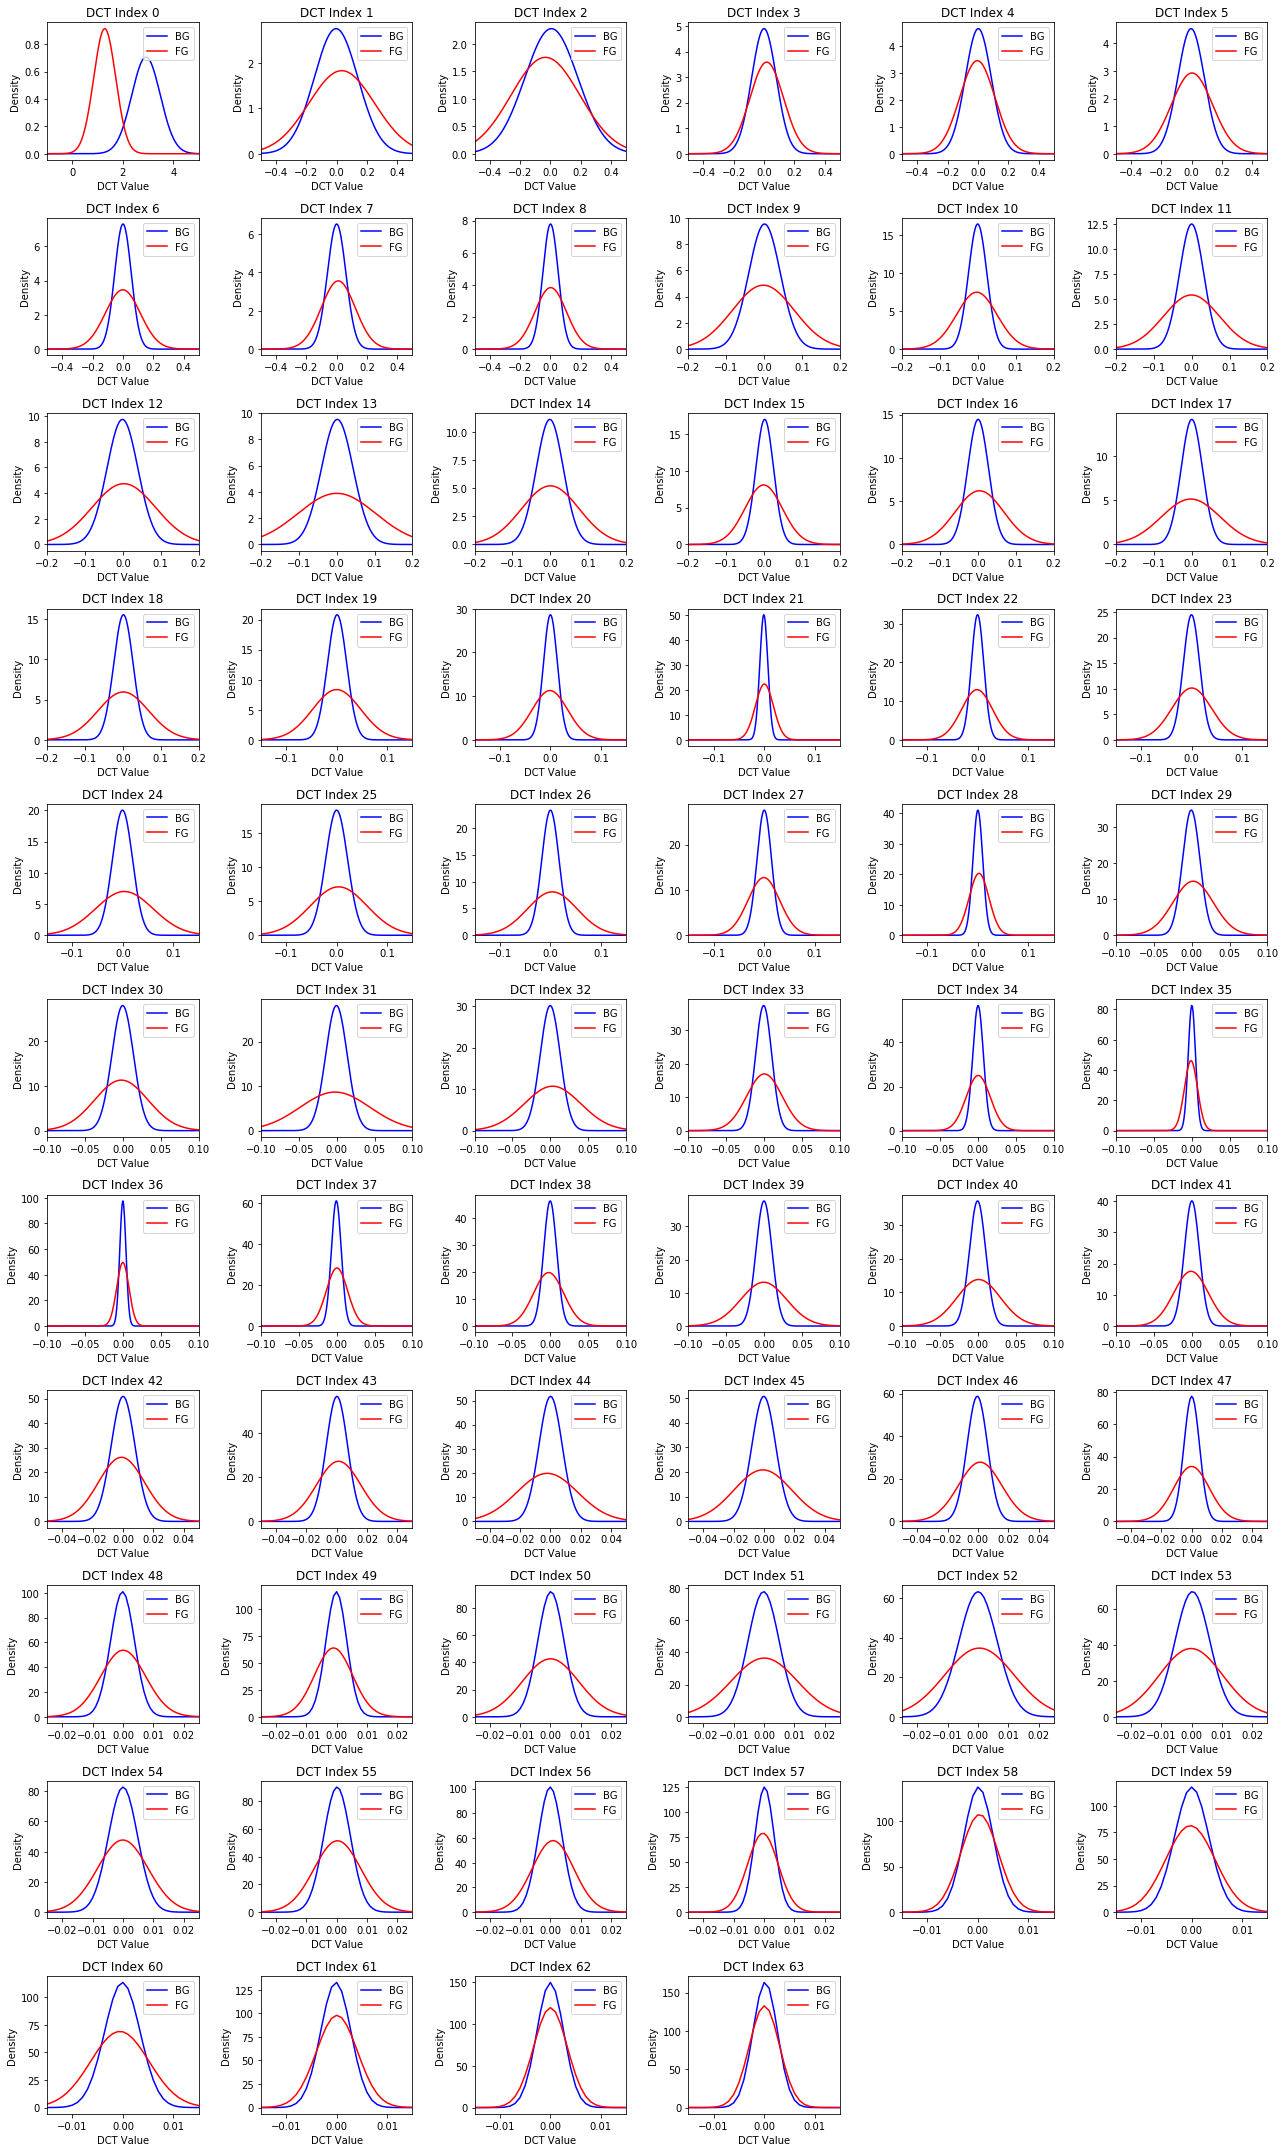

In [218]:
import matplotlib.pyplot as plt

def gaussian(x, mu, var):
    return 1./(np.sqrt(2.*np.pi*var))*np.exp(-np.power((x - mu), 2.)/(2*var))

plt.figure(0, figsize=(18,30))
dctvals = np.arange(-1,5,0.001)
dctmargBG = np.zeros((64,len(dctvals)))
dctmargFG = np.zeros((64,len(dctvals)))
for mm in range(64):
    dctmargBG[mm,:] = gaussian(dctvals, idxmeansBG[mm], idxvarsBG[mm])
    dctmargFG[mm,:] = gaussian(dctvals, idxmeansFG[mm], idxvarsFG[mm])
    plt.subplot(11,6,mm+1)
    plt.plot(dctvals, dctmargBG[mm,:], 'b', label='BG')
    plt.hold
    plt.plot(dctvals, dctmargFG[mm,:], 'r', label='FG')
    plt.title('DCT Index {0}'.format(mm))
    plt.xlabel('DCT Value')
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    if mm == 0:
        plt.xlim([-1,5])
    elif mm <= 8:
        plt.xlim([-0.5,0.5])
    elif mm <= 18:
        plt.xlim([-0.2,0.2])
    elif mm <= 28:
        plt.xlim([-0.15,0.15])
    elif mm <= 41:
        plt.xlim([-0.1,0.1])
    elif mm <= 47:
        plt.xlim([-0.05,0.05])
    elif mm <= 57:
        plt.xlim([-0.025,0.025])
    else:
        plt.xlim([-0.015,0.015])
        
plt.tight_layout()      
plt.savefig('allmarginals', dpi=600, bbox_inches='tight')
plt.show()

# Select the best and worst features
We will now manually select the eight best and worst features by inspecting the marginals plots for each DCT index. The best features are those with the least amount of overlapping area, however, we eliminate index 0 because we understand this feature is too dependent on lighting conditions for a particular picture. DCT index 17 is a good feature because there is a lot of foreground area outside of the cheetah main peak area, while index 63 is a bad feature.

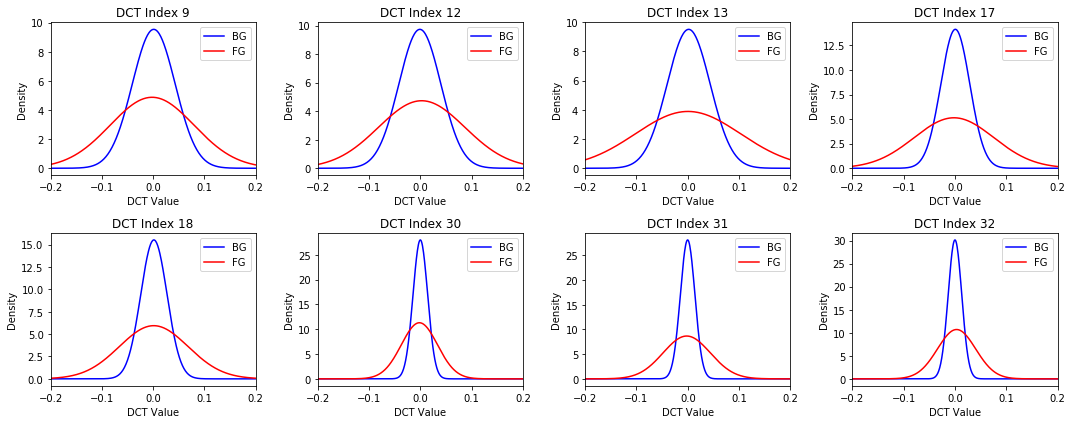

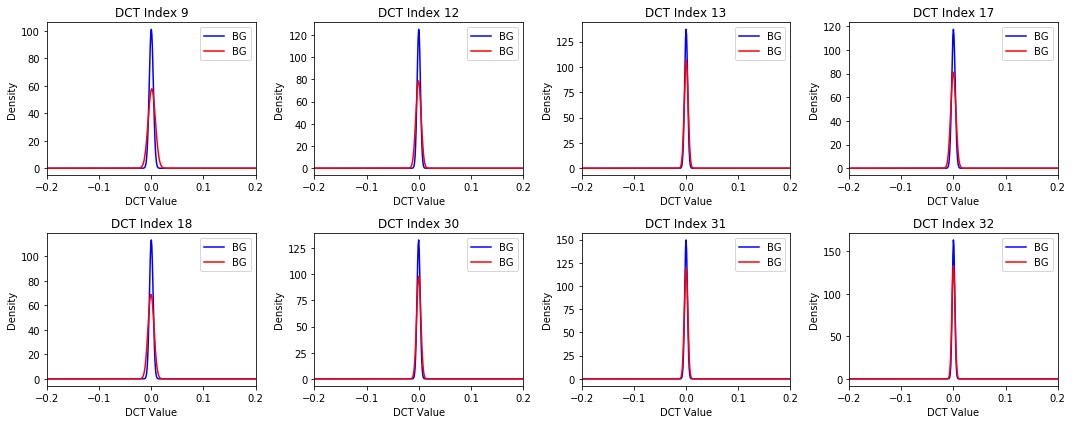

In [238]:
goodfeatidx = np.array([9,12,13,17,18,30,31,32])
badfeatidx = np.array([56,57,58,59,60,61,62,63])

plt.figure(1, figsize=(15,6))
for nn in range(8):
    plt.subplot(2,4,nn+1)
    plt.plot(dctvals, dctmargBG[goodfeatidx[nn],:], 'b', label='BG')
    plt.plot(dctvals, dctmargFG[goodfeatidx[nn],:], 'r', label='FG')
    plt.xlim([-0.2,0.2])
    plt.title('DCT Index {}'.format(goodfeatidx[nn]))
    plt.xlabel('DCT Value')
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    
plt.tight_layout()
plt.savefig('goodfeatures', dpi=600, bbox_inches='tight')
plt.show()

plt.figure(2, figsize=(15,6))
for nn in range(8):
    plt.subplot(2,4,nn+1)
    plt.plot(dctvals, dctmargBG[badfeatidx[nn],:], 'b', label='BG')
    plt.plot(dctvals, dctmargFG[badfeatidx[nn],:], 'r', label='BG')
    plt.xlim([-0.2,0.2])
    plt.title('DCT Index {}'.format(goodfeatidx[nn]))
    plt.xlabel('DCT Value')
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    
plt.tight_layout()
plt.savefig('badfeatures', dpi=600, bbox_inches='tight')
plt.show()

# Read in the grayscale image of a cheetah
Also convert from an array of integers between 0 and 255 to an array of doubles between 0 and 1 to match the training data format

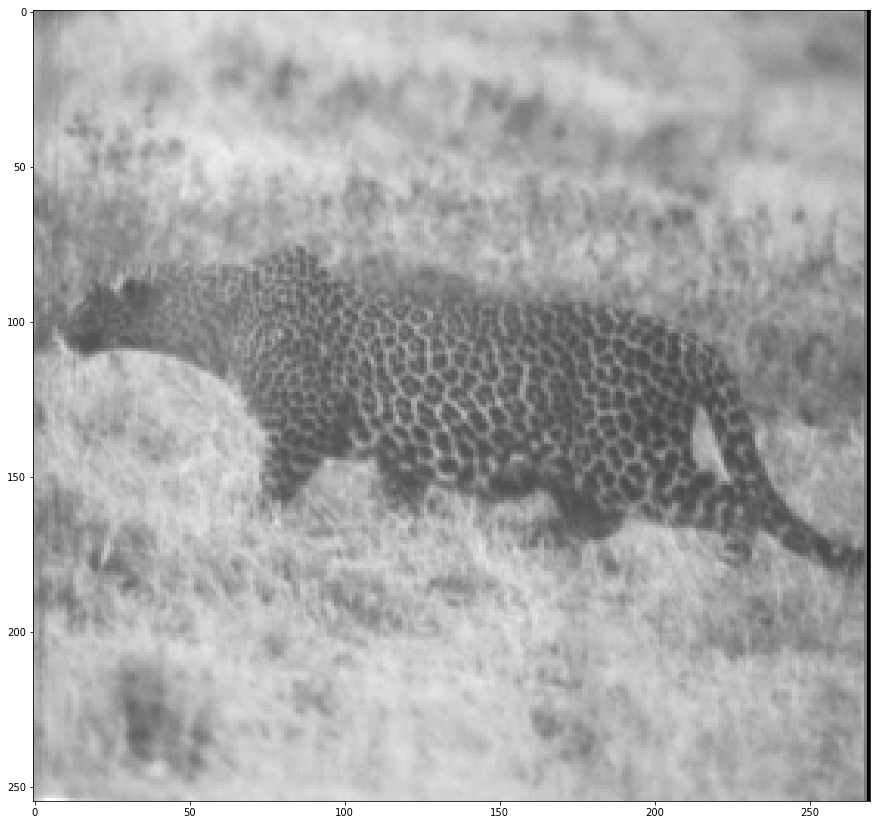

In [241]:
from scipy.misc import imread

rawimage = imread('givenData/cheetah.bmp', 'L')
plt.figure(figsize=(15,15))
plt.imshow(rawimage, cmap='gray')
plt.show()

doubleimage = rawimage.astype(float)/255 # convert from intergers 0->255 to floats 0->1

# Function to determine the 2-D discrete time transform from 1-D transforms
We need this because scipy does not have a direct implementation of the 2D transform

In [242]:
def dct2(img):
    """ Get 2D Cosine Transform of Image
    """
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

# Implement the classifier 
Go through the cheetah image in blocks of 8x8 pixels with a stride of 1 pixel, take the 2-D DCT of each of these blocks, vectorize using the zigzag pattern given and compute the density using the marginals created from the training data. We will form $p(\boldsymbol{x} | \text{cheetah})p(\text{cheetah})>p(\boldsymbol{x} | \text{background})p(\text{background})$ and decide cheetah if it is true and background otherwise.

In [255]:
from scipy.fftpack import dct

blksizecol = 8    # the number of horizontal pixels per block
blksizerow = 8    # the number of vertical pixels per block
dctlargest = 2    # choose this variables value largest dct from array
priorFG = 0.16 #0.16  # lets you play with the prior if you would like
priorBG = 1-priorFG

numrow, numcol = doubleimage.shape
cheetahmask1 = np.zeros((numrow,numcol))
cheetahmask2 = np.zeros((numrow,numcol))
dctflatordered = np.zeros(blksizerow*blksizecol)
for mm in range(numrow - blksizerow):
    for nn in range(numcol - blksizecol):
        block = doubleimage[mm:mm+blksizerow, nn:nn+blksizecol]
        blockdct = dct2(block)        
        blockdctflat = np.ndarray.flatten(blockdct)
        
        # this ordering keeps similar frequency values in contiguous array elements
        zigzagpattern = np.array([[ 0, 1, 5, 6,14,15,27,28],
                                  [ 2, 4, 7,13,16,26,29,42],
                                  [ 3, 8,12,17,25,30,41,43],
                                  [ 9,11,18,24,31,40,44,53],
                                  [10,19,23,32,39,45,52,54],
                                  [20,22,33,38,46,51,55,60],
                                  [21,34,37,47,50,56,59,61],
                                  [35,36,48,49,57,58,62,63]])
        zigzagflat = np.ndarray.flatten(zigzagpattern)
        
        # This loop does the reordering
        for ww in range(0,blksizecol*blksizerow):
            dctflatordered[zigzagflat[ww]] = blockdctflat[ww]
            
        pXgBG64 = 1
        pXgFG64 = 1
        for kk in range(64):
            pXgBG64 *= gaussian(dctflatordered[kk], idxmeansBG[kk], idxvarsBG[kk])
            pXgFG64 *= gaussian(dctflatordered[kk], idxmeansFG[kk], idxvarsFG[kk])
    
        # cheetahmask values should be either 0 for black pixels and 255 for white pixels
        FGorBGbigger64 = (pXgFG64*priorFG) > (pXgBG64*priorBG)
        cheetahmask1[mm,nn] = np.array(FGorBGbigger64, dtype=int)*255
        
        pXgBG8 = 1
        pXgFG8 = 1
        for kk in range(8):
            pXgBG8 *= gaussian(dctflatordered[goodfeatidx[kk]], idxmeansBG[goodfeatidx[kk]], idxvarsBG[goodfeatidx[kk]])
            pXgFG8 *= gaussian(dctflatordered[goodfeatidx[kk]], idxmeansFG[goodfeatidx[kk]], idxvarsFG[goodfeatidx[kk]])
    
        # cheetahmask values should be either 0 for black pixels and 255 for white pixels
        FGorBGbigger8 = (pXgFG8*priorFG) > (pXgBG8*priorBG)
        cheetahmask2[mm,nn] = np.array(FGorBGbigger8, dtype=int)*255

# Calculate the probability of error
This is done by comparing the generated mask to the given true mask pixel by pixel.

In [256]:
truemask = imread('givenData/cheetah_mask.bmp', 'L')

rowpix, colpix = truemask.shape
totalpix = rowpix*colpix
errors = truemask != cheetahmask1
numerrors = np.sum(errors)
perror64 = numerrors/totalpix

rowpix, colpix = truemask.shape
totalpix = rowpix*colpix
errors = truemask != cheetahmask2
numerrors = np.sum(errors)
perror8 = numerrors/totalpix

print('P(error 64 features) = {0:4.2%}'.format(perror64))
print('P(error 8 features) = {0:4.2%}'.format(perror8))

P(error 64 features) = 6.66%
P(error 8 features) = 10.18%


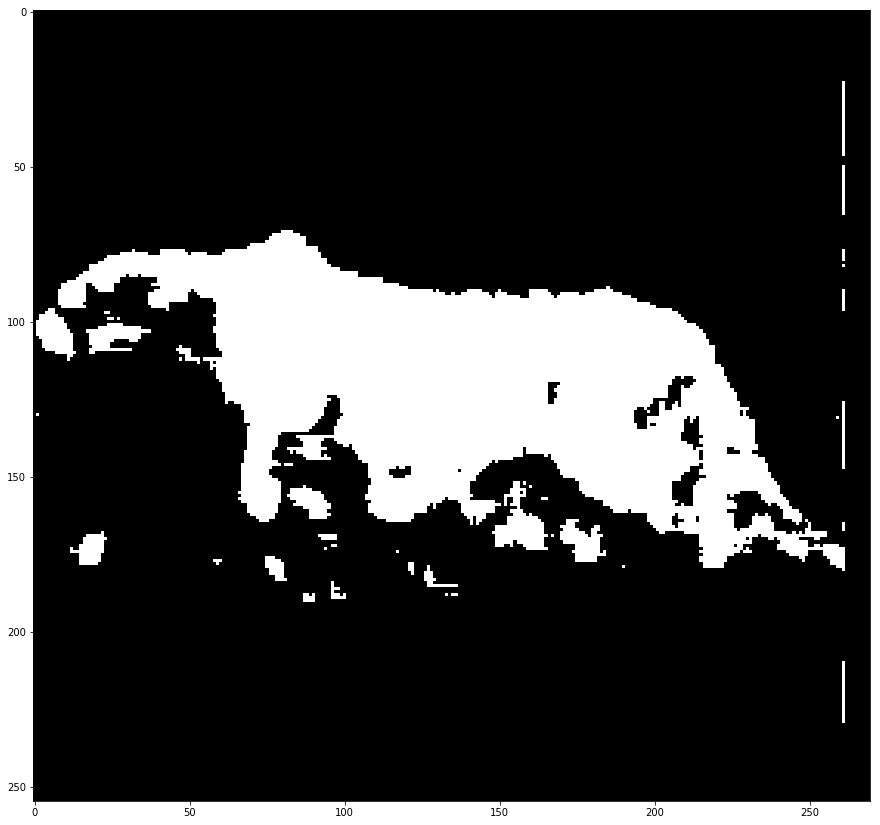

In [257]:
plt.figure(figsize=(15,15))
plt.imshow(cheetahmask1, cmap='gray')
plt.savefig('cheetahmask1', dpi=600, bbox_inches='tight')
plt.show()

The above is the generated mask of the cheetah when all 64 DCT coefficients are used as features, with white pixels denoting what the algorithm classified as cheetah and black pixels denoting background. The error was computed to be 6.66%. 

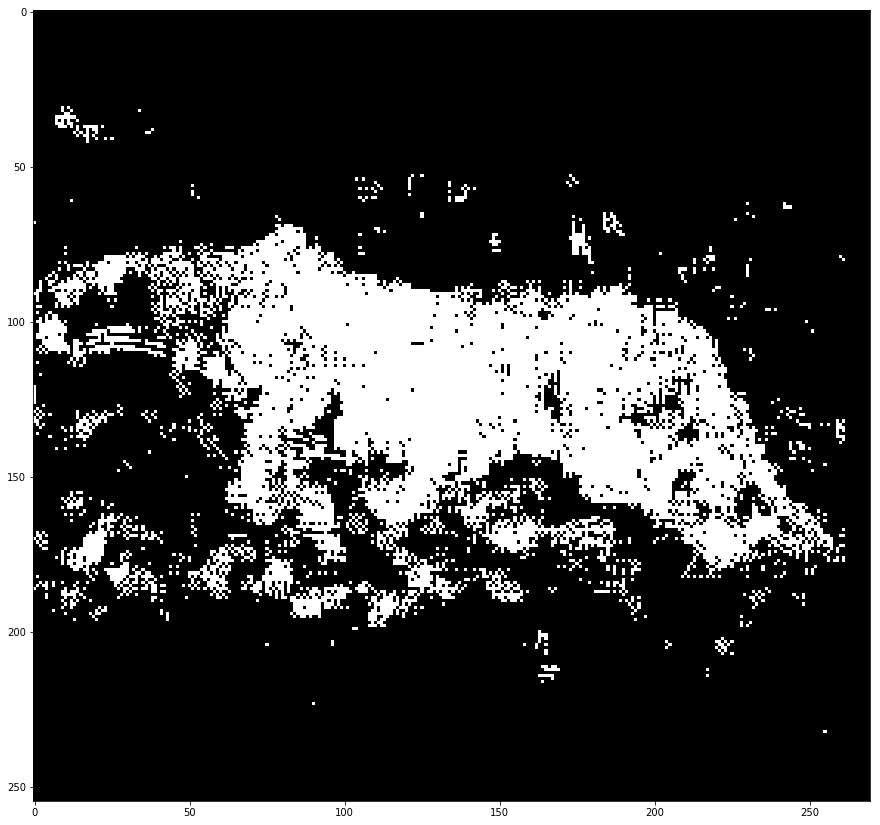

In [258]:
plt.figure(figsize=(15,15))
plt.imshow(cheetahmask2, cmap='gray')
plt.savefig('cheetahmask2', dpi=600, bbox_inches='tight')
plt.show()

The above is the generated mask of the cheetah when the best 8 DCT coefficients are used as features. It is not as good as the 64 feature mask, leading us to believe valuable information was left behind that should have been used. The error was computed to be 10.18%. 